In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedShuffleSplit
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Forest-Cover-Classification\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Forest-Cover-Classification\test.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Forest-Cover-Classification\sample_submission.csv')

In [4]:
train.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2982,186,14,323,66,5351,222,249,158,1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2929,243,15,335,33,5778,189,251,198,6429,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,3051,162,12,1224,253,3182,231,243,142,1167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
3,3090,345,17,362,92,2460,184,211,164,2384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,3023,4,9,234,51,4994,208,222,151,3813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7


In [5]:
test.head()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2798,151,12,60,-5,3373,236,240,132,6083,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3582,96,34,420,80,2579,250,170,19,3771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2619,171,12,270,-52,2764,228,245,147,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2897,155,5,210,14,2437,226,240,149,2455,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2845,32,12,309,47,2778,217,213,129,42,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train.describe()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.0,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,2959.328330,155.720241,14.028537,269.220792,46.332737,2346.340241,212.042134,223.446850,142.854630,1971.574871,0.450843,0.050327,0.435422,0.063408,0.004819,0.011945,0.007917,0.021480,0.002719,0.012771,0.000310,0.000516,0.001997,0.055077,0.020861,0.051566,0.030809,0.001170,0.0,0.004750,0.006231,0.003305,0.006850,0.017005,0.001274,0.057212,0.097074,0.036730,0.000585,0.004303,0.001824,0.001824,0.200172,0.051842,0.042065,0.091738,0.078967,0.002719,0.003064,0.000207,0.000379,0.027539,0.023821,0.014561,5.536110
std,277.578227,112.109417,7.458200,212.406921,58.938186,1558.148732,26.678889,19.610671,38.000582,1321.145310,0.497586,0.218623,0.495821,0.243699,0.069255,0.108640,0.088628,0.144981,0.052078,0.112287,0.017599,0.022718,0.044639,0.228135,0.142920,0.221153,0.172803,0.034192,0.0,0.068761,0.078689,0.057392,0.082484,0.129293,0.035666,0.232251,0.296064,0.188101,0.024184,0.065457,0.042675,0.042675,0.400136,0.221711,0.200742,0.288661,0.269692,0.052078,0.055267,0.014370,0.019456,0.163650,0.152494,0.119790,1.438261
min,1879.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,58.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,120.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2995.000000,128.000000,13.000000,218.000000,29.000000,1984.000000,218.000000,226.000000,143.000000,1704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [7]:
test.describe()

,Elevation(meters),Aspect(degrees),Slope(degrees),Horizontal_Distance_To_Hydrology(meters),Vertical_Distance_To_Hydrology(meters),Horizontal_Distance_To_Roadways(meters),Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points(meters),Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.00000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.00000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000,551962.000000
mean,2959.367246,155.653469,14.107660,269.439133,46.423388,2350.346942,212.151518,223.311973,142.511086,1980.749972,0.448761,0.051493,0.436108,0.063638,0.005238,0.013005,0.008321,0.021328,0.00275,0.011240,0.000174,0.000297,0.001973,0.056225,0.021386,0.051585,0.029959,0.001024,0.000005,0.004904,0.005872,0.003267,0.006924,0.01588,0.001451,0.057451,0.099521,0.036617,0.000828,0.004464,0.001872,0.001618,0.198260,0.051931,0.044286,0.090321,0.077650,0.002776,0.003265,0.000205,0.000520,0.026765,0.023759,0.015086
std,280.111066,111.903513,7.489805,212.557036,58.261247,1559.314218,26.774683,19.776974,38.288850,1324.355138,0.497368,0.221001,0.495901,0.244108,0.072182,0.113294,0.090841,0.144474,0.05237,0.105421,0.013187,0.017235,0.044374,0.230356,0.144666,0.221188,0.170473,0.031978,0.002331,0.069859,0.076402,0.057060,0.082924,0.12501,0.038067,0.232703,0.299361,0.187819,0.028762,0.066664,0.043220,0.040190,0.398689,0.221888,0.205729,0.286642,0.267621,0.052610,0.057044,0.014307,0.022797,0.161395,0.152297,0.121896
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [9]:
train.columns

Index(['Elevation(meters)', 'Aspect(degrees)', 'Slope(degrees)',
       'Horizontal_Distance_To_Hydrology(meters)',
       'Vertical_Distance_To_Hydrology(meters)',
       'Horizontal_Distance_To_Roadways(meters)', 'Hillshade_9am',
       'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points(meters)', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 

In [10]:
train.rename(columns={'Elevation(meters)':'Elevation' ,'Aspect(degrees)':'Aspect','Slope(degrees)':'Slope','Horizontal_Distance_To_Hydrology(meters)':'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology(meters)':'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways(meters)':'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points(meters)':'Horizontal_Distance_To_Fire_Points'},inplace=True)
test.rename(columns={'Elevation(meters)':'Elevation' ,'Aspect(degrees)':'Aspect','Slope(degrees)':'Slope','Horizontal_Distance_To_Hydrology(meters)':'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology(meters)':'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways(meters)':'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points(meters)':'Horizontal_Distance_To_Fire_Points'},inplace=True)

# FEATURE BY FEATURE ANALYSIS

## ELEVATION

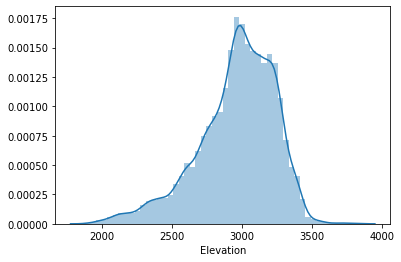

In [11]:
sns.distplot(train.Elevation)
t1 = train[train.Elevation<2200].index
train.drop(index=t1,inplace=True)
train.reset_index(drop=True,inplace=True)
t2 = train[train.Elevation>=3600].index
train.drop(index=t2,inplace=True)
train.reset_index(drop=True,inplace=True)

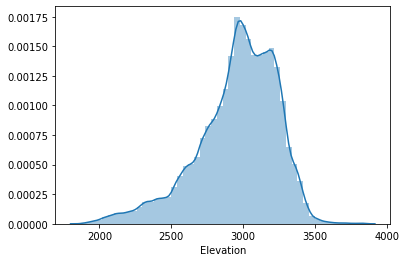

In [12]:
sns.distplot(test.Elevation)

### SLOPE

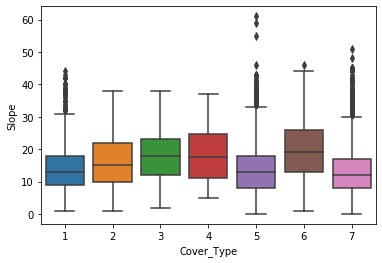

In [13]:
sns.boxplot(train.Cover_Type,train.Slope)

In [14]:
train.drop(index=train[train.Slope>56].index,inplace=True)
train.reset_index(drop=True,inplace=True)

### ASPECT

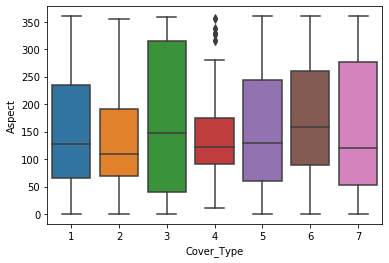

In [15]:
sns.boxplot(train.Cover_Type,train.Aspect)

### Horizontal_distance (all)

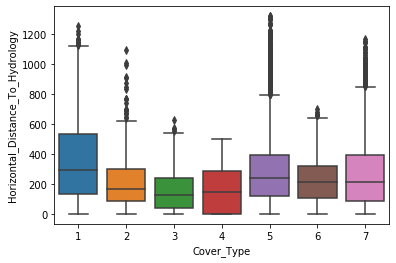

In [16]:
sns.boxplot(train.Cover_Type,train.Horizontal_Distance_To_Hydrology)

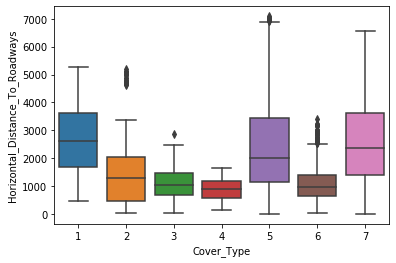

In [17]:
sns.boxplot(train.Cover_Type,train.Horizontal_Distance_To_Roadways)

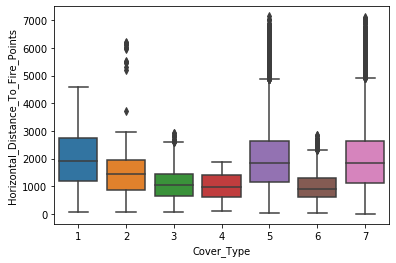

In [18]:
sns.boxplot(train.Cover_Type,train.Horizontal_Distance_To_Fire_Points)

### VERTICAL DISTANCE

In [19]:
train.Vertical_Distance_To_Hydrology=train.Vertical_Distance_To_Hydrology.apply(lambda x: x if x>0 else 0)
test.Vertical_Distance_To_Hydrology=test.Vertical_Distance_To_Hydrology.apply(lambda x: x if x>0 else 0)

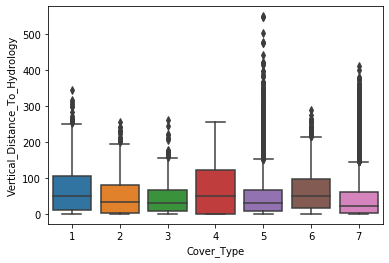

In [20]:
t1 = train[train.Vertical_Distance_To_Hydrology>550].index
train.drop(index=t1,inplace=True)
train.reset_index(drop=True,inplace=True)
sns.boxplot(train.Cover_Type,train.Vertical_Distance_To_Hydrology)

### HILLSHADE ALL

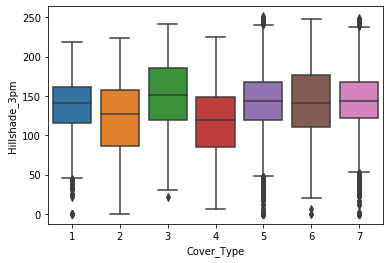

In [21]:
sns.boxplot(train.Cover_Type,train.Hillshade_3pm)

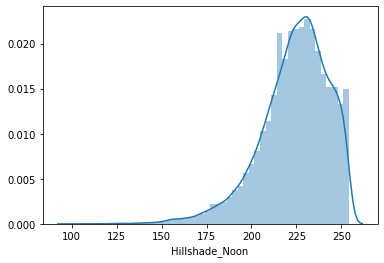

In [22]:
sns.distplot(train.Hillshade_Noon)

In [23]:
t1=train[train.Hillshade_Noon<180].index
train.drop(index=t1,inplace=True)
train.reset_index(drop=True,inplace=True)

In [24]:
t1=train[train.Hillshade_9am<160].index
train.drop(index=t1,inplace=True)
train.reset_index(drop=True,inplace=True)

In [25]:
train.drop(index=train[train.Hillshade_3pm<50].index,inplace=True)
train.reset_index(drop=True,inplace=True)

### SOIL TYPE

In [30]:
# Dropping these attributes as they were irrelevant 'Soil_Type_3','Soil_Type_5','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_14','Soil_Type_15','Soil_Type_18','Soil_Type_21','Soil_Type_25','Soil_Type_27','Soil_Type_28','Soil_Type_34','Soil_Type_36','Soil_Type_37','Soil_Type_16','Soil_Type_17','Soil_Type_26','Soil_Type_35','Soil_Type_6','Soil_Type_1','Soil_Type_19'

In [31]:
train.drop(columns=['Soil_Type_3','Soil_Type_5','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_14','Soil_Type_15','Soil_Type_18','Soil_Type_21','Soil_Type_25','Soil_Type_27','Soil_Type_28','Soil_Type_34','Soil_Type_36','Soil_Type_37','Soil_Type_16','Soil_Type_17','Soil_Type_26','Soil_Type_35','Soil_Type_6','Soil_Type_1','Soil_Type_19'],inplace=True)
test.drop(columns=['Soil_Type_3','Soil_Type_5','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_14','Soil_Type_15','Soil_Type_18','Soil_Type_21','Soil_Type_25','Soil_Type_27','Soil_Type_28','Soil_Type_34','Soil_Type_36','Soil_Type_37','Soil_Type_16','Soil_Type_17','Soil_Type_26','Soil_Type_35','Soil_Type_6','Soil_Type_1','Soil_Type_19'],inplace=True)

### GROUPBY APPLICATIONS

In [32]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [34]:
df['straight_dist'] = np.sqrt((df.Horizontal_Distance_To_Hydrology**2)+(df.Vertical_Distance_To_Hydrology**2))
df['Sum'] = df.Horizontal_Distance_To_Hydrology + df.Vertical_Distance_To_Hydrology +df.Horizontal_Distance_To_Roadways
df['Diff'] = np.sqrt((df.Elevation**2) - (df.straight_dist**2))

In [35]:
df['dist_road'] = np.sqrt((df.Horizontal_Distance_To_Roadways**2) + (df.Elevation**2))
df['dist_fire'] = np.sqrt((df.Horizontal_Distance_To_Fire_Points**2) + (df.Elevation**2))
df['dist_hydro'] = np.sqrt((df.Horizontal_Distance_To_Hydrology**2) + (df.Elevation**2))
df['dist_vert'] = np.sqrt((df.Vertical_Distance_To_Hydrology**2)+(df.Elevation**2))
df['rem_angle'] = 180-(abs(180-df.Aspect) - df.Slope)
df['road_fire_dist'] = abs(df.dist_road-df.dist_fire)
df['road_fire_hydro'] = abs(df.dist_hydro-df.dist_fire)
df['road_fire_rd_hydro'] = abs(df.dist_road-df.dist_hydro)

In [36]:
df['area_eval_mean']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('mean')
df['area_eval_max']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('max')
df['area_eval_min']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('min')
df['area_eval_nunique']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('nunique')

In [37]:
df['elev_soil_mean']=df.groupby(['Soil_Type_2', 'Soil_Type_4',
       'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',
        'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33',  'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'])[['Elevation']].transform('mean')
df['eval_soil_std']=df.groupby(['Soil_Type_2', 'Soil_Type_4',
       'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',
        'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33',  'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'])[['Elevation']].transform('std')
df['eval_soil_max']=df.groupby(['Soil_Type_2', 'Soil_Type_4',
       'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',
        'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33',  'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'])[['Elevation']].transform('max')
df['eval_soil_min']=df.groupby(['Soil_Type_2', 'Soil_Type_4',
       'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',
        'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33',  'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'])[['Elevation']].transform('min')
df['eval_soil_nunique']=df.groupby(['Soil_Type_2', 'Soil_Type_4',
       'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',
       'Soil_Type_20',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33',  'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'])[['Elevation']].transform('nunique')

In [359]:
df['area_eval_mean']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('mean')
df['area_eval_max']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('max') 
df['area_eval_min']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('min')
df['area_eval_nunique']=df.groupby(['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])[['Elevation']].transform('nunique')

In [40]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
train.drop(columns=['Hillshade_3pm','Hillshade_9am','Hillshade_Noon','Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'],inplace=True)
test.drop(columns=['Hillshade_3pm','Hillshade_9am','Hillshade_Noon','Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4','Cover_Type'],inplace=True)
test.reset_index(drop=True,inplace=True)

### MODELLING

In [41]:
label = train.Cover_Type
train.drop(columns=['Cover_Type'],inplace=True)
#test.drop(columns=['Soil_Type_15'],inplace=True)

In [42]:
def kfold(m,train,label,test,splits,rnd_st):
    score1,score2=[],[]
    p = pd.DataFrame(np.zeros(shape=(test.shape[0],splits*7)),index=test.index)
    pred=pd.DataFrame(np.zeros(shape=(test.shape[0],7)),index=test.index)
    splitter=StratifiedShuffleSplit(n_splits=splits)
    i=0
    l=[]
    for tr_index,te_index in splitter.split(train,label):
        x_train,x_test = train.loc[tr_index,:], train.loc[te_index,:]
        y_train,y_test = label.loc[tr_index],label.loc[te_index]
        
        m.fit(x_train,y_train)
        tr_pred = m.predict_proba(x_train)
        te_pred = m.predict_proba(x_test)
        
        score1.append(log_loss(pd.get_dummies(y_train).values,tr_pred))
        score2.append(log_loss(pd.get_dummies(y_test).values,te_pred))
        
        p.iloc[:,i:i+7] = m.predict_proba(test)
        i=i+7
        print('Training loss: {} \t\t\t\t Validation Loss: {}'.format(log_loss(pd.get_dummies(y_train).values,tr_pred),log_loss(pd.get_dummies(y_test).values,te_pred)))
    
    pd.Series(m.feature_importances_,index = train.columns).sort_values(ascending=True).plot.barh()
    print(np.mean(score1),np.mean(score2))   
    
    pred.iloc[:,0] = (p.iloc[:,0]+p.iloc[:,7]+p.iloc[:,14]+p.iloc[:,21]+p.iloc[:,28])/5
    pred.iloc[:,1] = (p.iloc[:,1]+p.iloc[:,8]+p.iloc[:,15]+p.iloc[:,22]+p.iloc[:,29])/5
    pred.iloc[:,2] = (p.iloc[:,2]+p.iloc[:,9]+p.iloc[:,16]+p.iloc[:,23]+p.iloc[:,30])/5
    pred.iloc[:,3] = (p.iloc[:,3]+p.iloc[:,10]+p.iloc[:,17]+p.iloc[:,24]+p.iloc[:,31])/5
    pred.iloc[:,4] = (p.iloc[:,4]+p.iloc[:,11]+p.iloc[:,18]+p.iloc[:,25]+p.iloc[:,32])/5
    pred.iloc[:,5] = (p.iloc[:,5]+p.iloc[:,12]+p.iloc[:,19]+p.iloc[:,26]+p.iloc[:,33])/5
    pred.iloc[:,6] = (p.iloc[:,6]+p.iloc[:,13]+p.iloc[:,20]+p.iloc[:,27]+p.iloc[:,34])/5
    
    return pred#   return(pd.DataFrame(m.predict_proba(test)))

In [43]:
seed=9291872

Training loss: 6.251181099830687e-15 				 Validation Loss: 0.30411511521041146
Training loss: 6.251181099830687e-15 				 Validation Loss: 0.2904586926265306
Training loss: 6.251181099830687e-15 				 Validation Loss: 0.2879992723899108
Training loss: 6.251181099830687e-15 				 Validation Loss: 0.30580758987227086
Training loss: 6.251181099830687e-15 				 Validation Loss: 0.29924407503826195
6.251181099830687e-15 0.2975249490274771


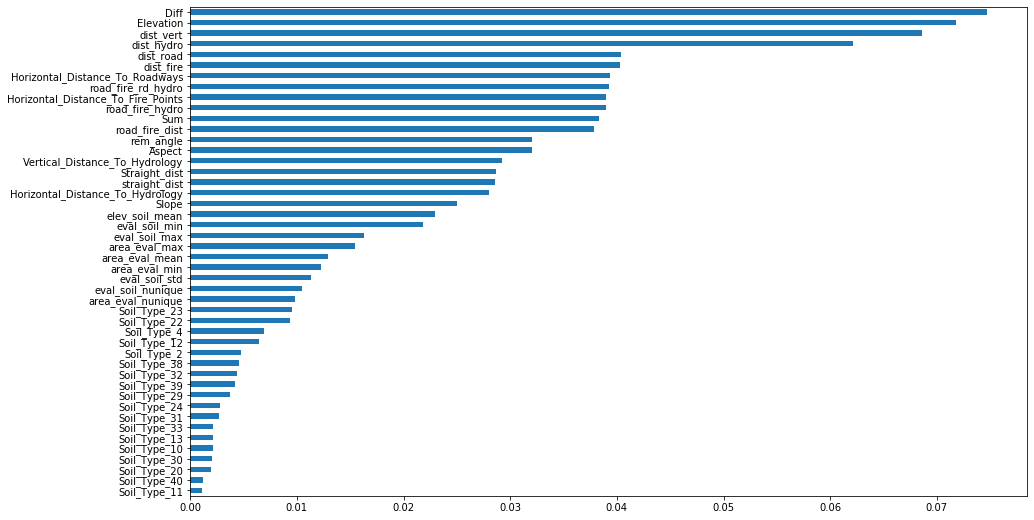

In [44]:
plt.figure(figsize=(15,9))
pred1 = kfold(ExtraTreesClassifier(n_estimators=500,random_state=seed),train,label,test,5,seed)

In [46]:
## Feature importance is taken from the last fold

In [47]:
pred1.columns=sample.columns

In [49]:
pred1.to_csv('extratree_sol.csv',index=False)